# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from IPython.display import display

## Preprocessing

In [ ]:
df = pd.read_csv('./engineered_df_with_category_interactions.csv')
print(df.shape)
df.head(3)

(66489, 218)


,age,height,weight,ap_hi,ap_lo,BMI,MAP,gender_1,gender_2,cholesterol_1,...,smoke_0 active_1,smoke_1 alco_0,smoke_1 alco_1,smoke_1 active_0,smoke_1 active_1,alco_0 active_0,alco_0 active_1,alco_1 active_0,alco_1 active_1,cardio
0,-0.433788,0.488110,-0.888124,-0.992845,-0.124219,-1.112179,-0.569948,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.309455,-1.100511,0.969301,0.825095,0.941111,1.707131,0.952717,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,-0.245851,0.090955,-0.726609,0.219115,-1.189548,-0.776977,-0.569948,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


In [ ]:
X = df.drop('cardio',axis=1)
y = df.cardio
X.head(3)

,age,height,weight,ap_hi,ap_lo,BMI,MAP,gender_1,gender_2,cholesterol_1,...,smoke_0 active_0,smoke_0 active_1,smoke_1 alco_0,smoke_1 alco_1,smoke_1 active_0,smoke_1 active_1,alco_0 active_0,alco_0 active_1,alco_1 active_0,alco_1 active_1
0,-0.433788,0.488110,-0.888124,-0.992845,-0.124219,-1.112179,-0.569948,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.309455,-1.100511,0.969301,0.825095,0.941111,1.707131,0.952717,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.245851,0.090955,-0.726609,0.219115,-1.189548,-0.776977,-0.569948,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scores

In [ ]:
lgr = LogisticRegression(max_iter=10000)
cv_results = cross_validate(lgr,X_train,y_train,return_train_score=True)
acc_train = cv_results['train_score'].mean()
acc_valid = cv_results['test_score'].mean()

print('  training accuracy:',acc_train.round(2))
print('validation accuracy:',acc_valid.round(2))

  training accuracy: 0.73
validation accuracy: 0.73


In [ ]:
lgr.fit(X_train,y_train)
acc_test = lgr.score(X_test, y_test)
print('   testing accuracy:',acc_test.round(2))

   testing accuracy: 0.73


In [ ]:
results = pd.DataFrame()
results['i'] = np.arange(1,6)
results['train acc'] = cv_results['train_score'].round(3)
results['valid acc'] = cv_results['test_score'].round(3)
results.head(3)

,i,train acc,valid acc
0,1,0.733,0.735
1,2,0.734,0.728
2,3,0.732,0.738


<AxesSubplot:xlabel='i'>

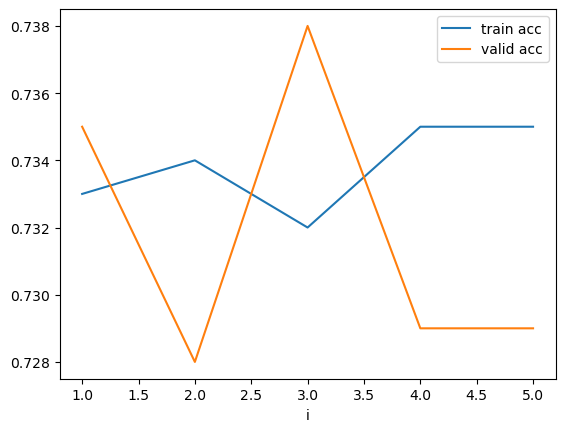

In [ ]:
ax1 = results.plot.line(x='i',y='train acc')
results.plot.line(x='i',y='valid acc',ax=ax1)

## Feature Importance

In [ ]:
coef = lgr.coef_
coef = pd.Series(coef[0],index=X.columns)
print(coef.sort_values(ascending=False).round(3))

weight cholesterol_3    0.451
BMI smoke_1             0.435
weight smoke_0          0.378
BMI cholesterol_1       0.368
BMI active_0            0.294
                        ...  
height cholesterol_3   -0.254
weight cholesterol_1   -0.366
BMI smoke_0            -0.373
weight smoke_1         -0.377
BMI cholesterol_3      -0.393
Length: 217, dtype: float64


<AxesSubplot:>

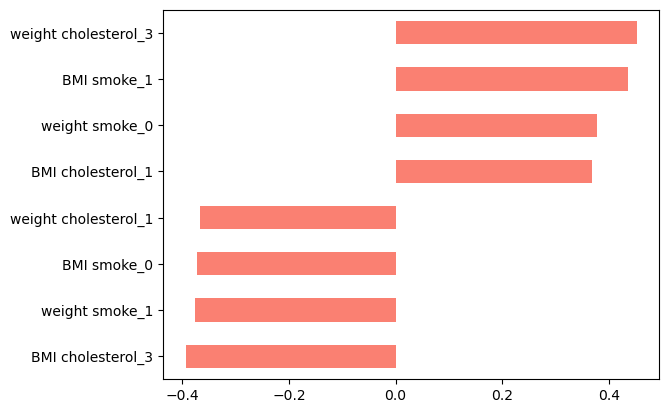

In [ ]:
coef.loc[lambda x : abs(x) > 0.3].sort_values().plot.barh(color='salmon')

## Predictions

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_predict = pd.DataFrame()
X_predict['predicted_cardio'] = lgr.predict(X_test)
X_predict['actual_cardio'] = y_test.reset_index(drop=True)
X_predict.head(10)

,predicted_cardio,actual_cardio
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,0,1
7,1,0
8,0,1
9,1,1


## No Feature Engineering

In [ ]:
df = pd.read_csv('cleaned_df.csv')
df.head(3)

,age,height,weight,ap_hi,ap_lo,BMI,MAP,gender_1,gender_2,cholesterol_1,...,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1,cardio
0,18393,168,62.0,110,80,21.967,90.000,0,1,1,...,1,0,0,1,0,1,0,0,1,0
1,20228,156,85.0,140,90,34.928,106.667,1,0,0,...,1,0,0,1,0,1,0,0,1,1
2,18857,165,64.0,130,70,23.508,90.000,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [ ]:
X = df.drop('cardio',axis=1)
y = df.cardio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lgr = LogisticRegression(max_iter=10000)
lgr.fit(X_train,y_train)
X_predict = X_test.copy()
X_predict['predicted_cardio'] = lgr.predict(X_test)
X_predict['actual_cardio'] = y_test
X_predict.head(10)

,age,height,weight,ap_hi,ap_lo,BMI,MAP,gender_1,gender_2,cholesterol_1,...,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1,predicted_cardio,actual_cardio
37152,16692,160,65.0,120,80,25.391,93.333,0,1,0,...,0,0,0,1,1,0,1,0,0,0
1003,22029,180,102.0,140,90,31.481,106.667,1,0,1,...,0,0,1,0,1,0,0,1,1,1
16217,22478,160,66.0,120,80,25.781,93.333,1,0,0,...,0,1,1,0,1,0,0,1,1,1
16801,22557,156,90.0,130,80,36.982,96.667,1,0,1,...,0,0,1,0,1,0,0,1,1,1
32354,20381,156,62.0,120,80,25.477,93.333,0,1,1,...,0,0,1,0,1,0,0,1,0,0
20884,18886,162,73.0,140,110,27.816,120.000,1,0,1,...,0,0,1,0,1,0,0,1,1,1
23256,22069,155,62.0,110,80,25.806,90.000,1,0,1,...,0,0,1,0,1,0,0,1,0,1
7470,20475,163,58.0,120,80,21.830,93.333,1,0,0,...,0,1,1,0,1,0,1,0,0,0
63792,19182,178,85.0,120,80,26.827,93.333,1,0,1,...,0,0,1,0,1,0,1,0,0,1
6714,23129,162,65.0,130,90,24.768,103.333,0,1,1,...,0,0,1,0,1,0,0,1,1,1


## Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# def provided by https://towardsdatascience.com/comprehensive-tutorial-on-using-confusion-matrix-in-classification-92be4d70ea18
def custom_confusion_matrix(y_true, y_pred, display_labels=None):
    """
    A function to plot a custom confusion matrix with
    positive class as the first row and the first column.
    """
    # Create a flipped matrix
    cm = np.flip(confusion_matrix(y_true, y_pred))
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 5))
    cmp = ConfusionMatrixDisplay(cm, display_labels=display_labels)
    cmp.plot(ax=ax, cmap='PuRd')
    plt.grid(False)

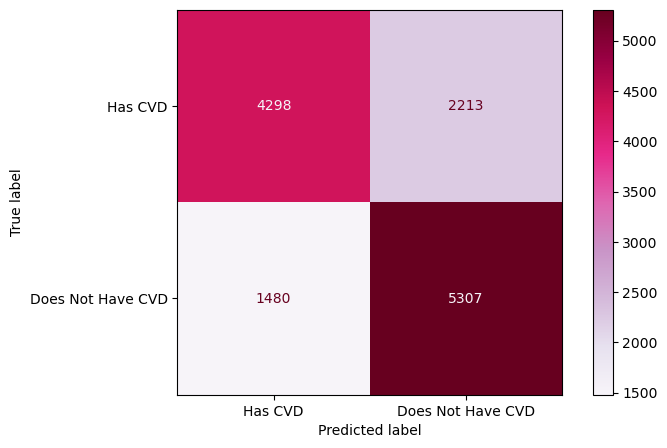

In [ ]:
# Generate the testing confusing matrix
yh = lgr.predict(X_test)
custom_confusion_matrix(
    y_test, yh,
    display_labels=["Has CVD", "Does Not Have CVD"]
)

In [ ]:
false_neg = (2213/(2213+1480))*100
print('false negatives', false_neg)

false negatives 59.92418088275115
